<a href="https://colab.research.google.com/github/keepupwith/ClothesManagerAPP/blob/master/137assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
#%%
# A bit of setup
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
# Get the shape of a tensor:

a = torch.tensor([1, 2, 3], dtype=torch.float32)

print('a has shape: ', a.size())


# If `b = [1, 1, 1]` has the same shape as a, then a + b should work,
# TODO: the line below has an error, please fix it.

b = torch.tensor([1, 1,1])
print("a + b is: ", a + b)


a has shape:  torch.Size([3])
a + b is:  tensor([2., 3., 4.])


In [181]:
# broadcasting: adding `a` to each row of `c`
# `a` and `c` has different shapes, but `a`'s shape matches the last
# dimension of `c`, so we can still add them together -- it is equivalent to
# repeat `a` along the first dimension and then add it to `c`.


a = torch.tensor([1, 2, 3], dtype=torch.float32)
c = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)
added_result = c + a.view(-1, 1)
print("Adding a to rows of c gives:")
print(added_result)

# TODO: broadcasting: adding `a` to each COLUMN of `c` so that the addition result
# matches `result`

result = torch.tensor([[ 2.,  3.,  4.], [ 6.,  7.,  8.], [10., 11., 12.]])
diff = torch.sum(torch.abs(added_result - result))

if diff > 1e-6:
    raise Exception("The calculation is wrong. The correct result should be \n" + str(result))





Adding a to rows of c gives:
tensor([[ 2.,  3.,  4.],
        [ 6.,  7.,  8.],
        [10., 11., 12.]])


In [182]:

import torch

c = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

print('Sum up c along rows:', torch.sum(c, axis=1)) # the `axis` specifies the dimension to be ``reduced''

# Sum up c along columns
c_col_sum = torch.sum(c, axis=0)

result = torch.tensor([12, 15, 18], dtype=torch.float32)
print('Sum up c along columns should be ', result) # the `axis` specifies the dimension to be ``reduced''

diff = torch.sum(torch.abs(c_col_sum - result))
if diff > 1e-6:
    raise Exception("The calculation is wrong")

print("The calculation is correct")


# similar functions are torch.max, torch.logsumexp


Sum up c along rows: tensor([ 6., 15., 24.])
Sum up c along columns should be  tensor([12., 15., 18.])
The calculation is correct


In [183]:
# matrix multiplication



# Use this line, otherwise it doesn't work.
b = torch.tensor([[1, 1, 1], [1, 1, 1]] , dtype=torch.float32)
print('b has shape: ', b.size())

c = torch.tensor([[2], [2], [2]], dtype=torch.float32)
print('c has shape: ', c.size())


print(torch.matmul(b, c))


b has shape:  torch.Size([2, 3])
c has shape:  torch.Size([3, 1])
tensor([[6.],
        [6.]])


In [184]:
# Q2

import implementation
from implementation import regression_func

x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad = True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

y_hat = regression_func(x, w, b)

# y_hat should be [3.2, 7.2]
print(y_hat.detach().numpy())

diff = torch.sum(torch.abs(y_hat - torch.tensor([3.2, 7.2])))
if diff > 1e-6:
    raise Exception("The calculation is incorrect.")


[3.2 7.2]


In [185]:
from implementation import loss_func
#Q3
# TODO: you need to fix an issue in this line, otherwise it does not work with the loss function
y = torch.tensor([3, 7])

loss = loss_func(y, y_hat)

# the loss should be 0.08
print(loss)

diff = torch.sum(torch.abs(loss - 0.08))
if diff > 1e-6:
    raise Exception("The calculation is incorrect.")



tensor(0.0800, grad_fn=<SumBackward0>)


In [ ]:
# Check the computation graph.
# NOTE: when you have multiple runs, remember to choose the correct run to display the graph
# %tensorboard --logdir runs
#Q4
!pip install torchviz

import torchviz


var1 = torch.tensor(1.0, requires_grad = True)
var2 = 5
var3 = torch.tensor(3.0, requires_grad = False)

var4 = var1 + var2 + var3


torchviz.make_dot(var4)

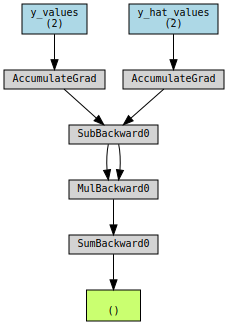

In [187]:
#Q5
# TODO: please write code to show the computation graph of `loss`.
y=torch.tensor([3.0,7.0],requires_grad=True)
y_hat=torch.tensor([3.2,7.2],requires_grad=True)
loss=loss_func(y,y_hat)

torchviz.make_dot(loss,params={'y_values':y,'y_hat_values':y_hat})

In [188]:
# Check gradients of parameters

x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad = True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

y_hat = regression_func(x, w, b)
loss  = loss_func(y, y_hat)

# TODO: uncomment the following line so that torch computes gradients and stores them in `.grad`
loss.backward()

dl_dwb = [w.grad, b.grad]

if w.grad is None or b.grad is None:
    raise Exception("No gradient is computed for w or b")

# gradient with respect to w and b
print(dl_dwb)

[tensor([1.6000, 2.4000]), tensor(0.8000)]


In [189]:
# Update model parameters in one optimization step
# TODO: Can you fix the following to lines, so `w` will be updated by the optimizer ?
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad=True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

# note that the learning rate is 1.0
optimizer = torch.optim.SGD([w, b], lr=1.0)
optimizer.zero_grad()

y_hat = regression_func(x, w, b)
loss  = loss_func(y, y_hat)

loss.backward()

optimizer.step()

# Check the result below. Note that the calculation is: w <- w - dw * learning_rate;
# it is subtraction, not addtion.
print(w)
print(b)

diff = torch.sum(torch.abs(w - torch.tensor([1.0, 1.0])))
if diff < 1e-6:
    raise Exception("w is not updated by the optimizer.")

tensor([-0.6000, -1.4000], requires_grad=True)
tensor(-0.6000, requires_grad=True)


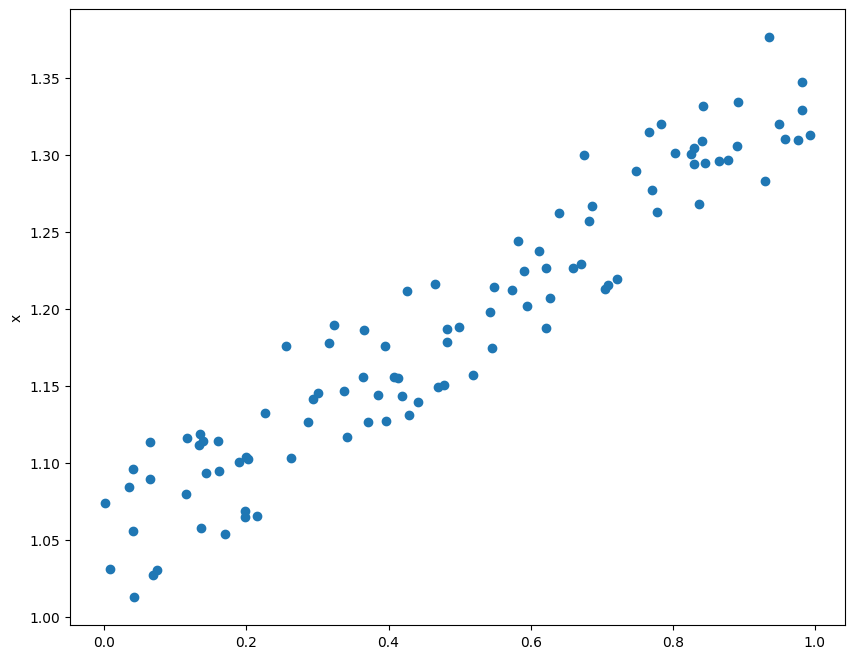

In [190]:
# plot the data before fitting the model.
# numpy values
N = 100
x_np = np.random.random_sample([N, 1]).astype(np.float32)
y_np = (np.squeeze(x_np.dot([[0.3]])) + 1.0 + 0.1 * np.random.random_sample([N])).astype(np.float32)

plt.plot(np.squeeze(x_np), y_np, 'o')
plt.ylabel('y')
plt.ylabel('x')
plt.show()


In [192]:
from implementation import train_lr

# You may want to use a small lambda the regularization weight
lamb = 4000

w, b = train_lr(x=x_np, y=y_np, lamb=lamb)

print('(w, b) = ', (w, b))

# the result should be similar to (0.3, 1.0)

Loss becomes tensor(111.1672, grad_fn=<AddBackward0>) after 1 iterations.
Loss becomes tensor(0.1729, grad_fn=<AddBackward0>) after 101 iterations.
Loss becomes tensor(0.0809, grad_fn=<AddBackward0>) after 201 iterations.
Loss becomes tensor(0.0748, grad_fn=<AddBackward0>) after 301 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 401 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 501 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 601 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 701 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 801 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 901 iterations.
Loss becomes tensor(0.0744, grad_fn=<AddBackward0>) after 1000 iterations.
(w, b) =  (tensor([0.2926], requires_grad=True), tensor(1.0461, requires_grad=True))


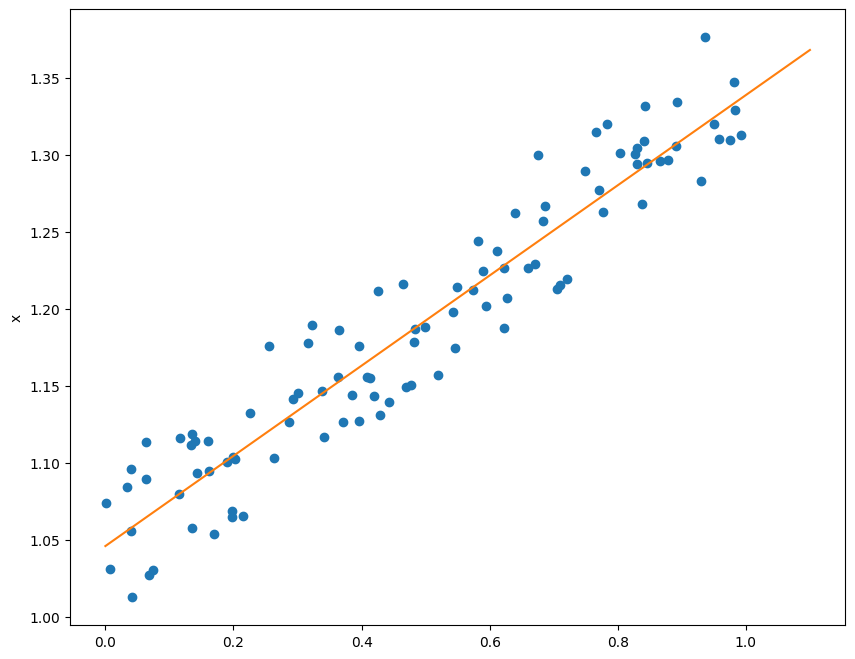

In [193]:
# Plot the result

w_np = w.detach().numpy()
b_np = b.detach().numpy()

x_line = np.arange(12) / 10.0
y_line = x_line * np.squeeze(w_np) + b_np

plt.plot(x_np, y_np, 'o')
plt.plot(x_line, y_line)
plt.ylabel('y')
plt.ylabel('x')
plt.show()


# Please check whether the trained model fit the data (the line roughly cross data points).
# If your model does not fit the data well, your model training is probably not successful.
